# Machine Learning Final Project train the deep learning model and Comparing the performance of Deep learning Algorthim and three traditional Machine Learning Models.

An excellent tool for image processing and computer vision work is OpenCV. It is a free library that may be used to carry out operations like face recognition, object tracking, landmark recognition, and many other things.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import cv2
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report,confusion_matrix

A complete open source machine learning platform is called TensorFlow. The class concentrates on using a specific TensorFlow API to create and train machine learning models, despite the fact that TensorFlow is a robust system for managing all parts of a machine learning system.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import softmax,sigmoid,relu
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.layers import Conv2D,MaxPool2D,AvgPool2D,Flatten,Dropout,Dense,MaxPooling2D
from sklearn.metrics import classification_report,confusion_matrix

# Collected the chest_xray dataset of  pneumonia effect persons and normal persons, below shown images are samples.

Undiseased lungs


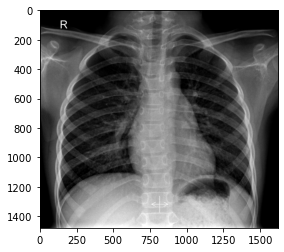

PNEUMONIA effected lungs


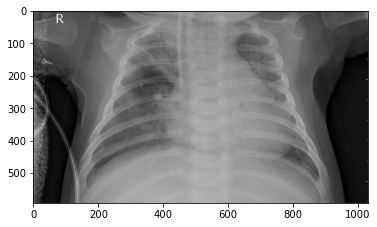

In [3]:
img1 =r"C:\Users\LAHARI\Downloads\chest_xray\train\Normal\IM-0764-0001.jpeg"
print("Undiseased lungs")
im = cv2.imread(img1)
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB)) 
plt.show()
img2 =r"C:\Users\LAHARI\Downloads\chest_xray\train\PNEUMONIA\person253_bacteria_1155.jpeg"
print("PNEUMONIA effected lungs")
im = cv2.imread(img2) 
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB)) 
plt.show()

In [4]:
from PIL import Image
import os
import shutil
from skimage.io import imread
from PIL import Image
training_path=r'C:\Users\LAHARI\Downloads\chest_xray\train'
testing_path =r'C:\Users\LAHARI\Downloads\chest_xray\test'

In deep learning, a convolutional neural network (CNN) is a class of artificial neural network most commonly applied to analyze visual imagery.

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.50)

The original data inputs are used to feed the Keras ImageDataGenerator, which transforms the data randomly and outputs a result that only contains the newly altered data. The data are not included. In order to broaden the model's applicability, additional data is added using the Keras ImageDataGenerator module. Data augmentation uses an image data generator to conduct random operations on data, including translations, rotations, scale modifications, and vertical flips.

In [6]:
batch_size = 20
input_shape=(150,150,3)

In [7]:
train_datagen = datagen.flow_from_directory(
    training_path,
    target_size=input_shape[:2],   
    class_mode='binary') 

Found 1174 images belonging to 2 classes.


In [8]:
valid_datagen = datagen.flow_from_directory(
    testing_path, 
    target_size=input_shape[:2],
    class_mode='binary') 

Found 624 images belonging to 2 classes.


In [9]:
model =  Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding = 'same',activation = 'relu',input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size = (2,2),strides = 2, padding='valid'))
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [10]:
model.compile(optimizer ='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [11]:
#Epoch is crucial in machine learning modeling because it helps identify the model that most accurately represents the data.
hist = model.fit(
         train_datagen,
        validation_data = valid_datagen,       
        epochs = 10)

Epoch 1/10
37/37 [==============================] - 150s 4s/step - loss: 0.6034 - accuracy: 0.7956 - val_loss: 0.4791 - val_accuracy: 0.8173
Epoch 2/10
37/37 [==============================] - 156s 4s/step - loss: 0.2207 - accuracy: 0.9131 - val_loss: 0.6949 - val_accuracy: 0.7612
Epoch 3/10
37/37 [==============================] - 164s 4s/step - loss: 0.1210 - accuracy: 0.9472 - val_loss: 1.2953 - val_accuracy: 0.7019
Epoch 4/10
37/37 [==============================] - 161s 4s/step - loss: 0.1181 - accuracy: 0.9600 - val_loss: 0.6291 - val_accuracy: 0.7997
Epoch 5/10
37/37 [==============================] - 164s 4s/step - loss: 0.0759 - accuracy: 0.9710 - val_loss: 1.1787 - val_accuracy: 0.7548
Epoch 6/10
37/37 [==============================] - 160s 4s/step - loss: 0.0436 - accuracy: 0.9847 - val_loss: 1.2141 - val_accuracy: 0.7708
Epoch 7/10
37/37 [==============================] - 159s 4s/step - loss: 0.0328 - accuracy: 0.9855 - val_loss: 1.3652 - val_accuracy: 0.7500
Epoch 8/10
37

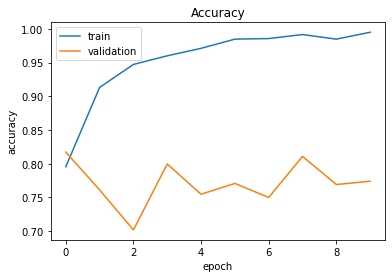

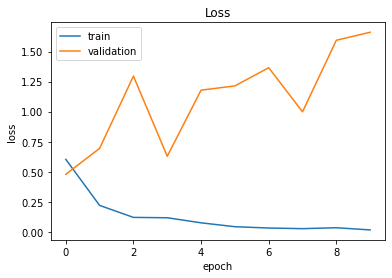

In [12]:
hist
plt.title('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [13]:
from sklearn import metrics
from sklearn.metrics import classification_report
y_pred = (model.predict(valid_datagen) > 0.505).astype(int)
y_test = valid_datagen.classes
print(classification_report(y_test, y_pred))

20/20 [==============================] - 32s 2s/step
              precision    recall  f1-score   support

           0       0.38      0.16      0.22       234
           1       0.63      0.85      0.72       390

    accuracy                           0.59       624
   macro avg       0.50      0.50      0.47       624
weighted avg       0.53      0.59      0.53       624



The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label a negative sample as positive.
The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
The F1-score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
The support is the number of occurrences of each class in y_true.

In [14]:
y_pred.ravel()

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [15]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [16]:
train_datagen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

<AxesSubplot:>

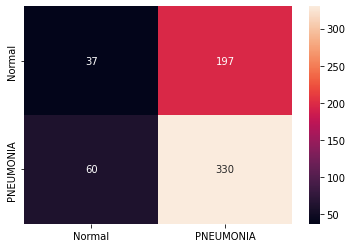

In [17]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,xticklabels=['Normal','PNEUMONIA'],yticklabels=['Normal','PNEUMONIA'],fmt="1")


Conclusion for CNN model:
    Accuracy is 61%.

# Traditional Machine learning models:

In [18]:
import pandas as pd
from sklearn import svm
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle
Efftype = ['Normal','Pneumonia']
training_path=r'C:\Users\LAHARI\Downloads\chest_xray\train'
testing_path =r'C:\Users\LAHARI\Downloads\chest_xray\test'

In [19]:
flat_data_arr=[]
target_arr=[]
# Loading training data of NORMAL and PNEUMONIA LUNGS chestx-ray
datadir=training_path
for i in Efftype:
    print(f'lungs type: {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Efftype.index(i))
    print(f'lungs type:{i} lungs data loaded successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

lungs type: Normal
lungs type:Normal lungs data loaded successfully
lungs type: Pneumonia
lungs type:Pneumonia lungs data loaded successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.000624,0.000624,0.000624,1.554703e-02,1.554703e-02,1.554703e-02,0.046477,0.046477,0.046477,0.092571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.224595,0.224595,0.224595,2.220384e-01,2.220384e-01,2.220384e-01,0.201172,0.201172,0.201172,0.192875,...,0.265450,0.265450,0.265450,0.246621,0.246621,0.246621,0.422345,0.422345,0.422345,0
2,0.576460,0.576460,0.576460,5.711765e-01,5.711765e-01,5.711765e-01,0.476906,0.476906,0.476906,0.462792,...,0.100622,0.100622,0.100622,0.098766,0.098766,0.098766,0.102116,0.102116,0.102116,0
3,0.000000,0.000000,0.000000,2.798602e-07,2.798602e-07,2.798602e-07,0.000330,0.000330,0.000330,0.009659,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000001,0.000001,0.000001,0.001085,...,0.000007,0.000007,0.000007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,0.069326,0.069326,0.069326,1.102778e-01,1.102778e-01,1.102778e-01,0.143043,0.143043,0.143043,0.166732,...,0.368588,0.368588,0.368588,0.246054,0.246054,0.246054,0.111813,0.111813,0.111813,1
1170,0.367269,0.367269,0.367269,3.845874e-01,3.845874e-01,3.845874e-01,0.387758,0.387758,0.387758,0.390509,...,0.407631,0.407631,0.407631,0.461603,0.461603,0.461603,0.483875,0.483875,0.483875,1
1171,0.186600,0.186600,0.186600,1.958581e-01,1.958581e-01,1.958581e-01,0.203598,0.203598,0.203598,0.210261,...,0.061562,0.061562,0.061562,0.068663,0.068663,0.068663,0.080657,0.080657,0.080657,1
1172,0.174943,0.174943,0.174943,1.746081e-01,1.746081e-01,1.746081e-01,0.179924,0.179924,0.179924,0.178424,...,0.137259,0.137259,0.137259,0.138153,0.138153,0.138153,0.140960,0.140960,0.140960,1


In [20]:
x_train=df.drop(['Target'],axis=1)
y_train=df['Target']
print('Splitted Successfully')

Splitted Successfully


In [21]:
flat_data_arr=[]
target_arr=[]
# Loading testing data of NORMAL and PNEUMONIA LUNGS chestx-ray
datadir=testing_path
for i in Efftype:
    print(f'lungs type : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Efftype.index(i))
    print(f'lungs type:{i} lungs data loaded successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df2=pd.DataFrame(flat_data)
df2['Target']=target
df2.head()

lungs type : Normal
lungs type:Normal lungs data loaded successfully
lungs type : Pneumonia
lungs type:Pneumonia lungs data loaded successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.122207,0.122207,0.122207,0.125258,0.125258,0.125258,0.123472,0.123472,0.123472,0.120515,...,0.130572,0.130572,0.130572,0.130024,0.130024,0.130024,0.126799,0.126799,0.126799,0
1,0.105979,0.105979,0.105979,0.124858,0.124858,0.124858,0.109188,0.109188,0.109188,0.166194,...,0.129098,0.129098,0.129098,0.128679,0.128679,0.128679,0.114257,0.114257,0.114257,0
2,0.142660,0.142660,0.142660,0.143883,0.143883,0.143883,0.142252,0.142252,0.142252,0.136136,...,0.135853,0.135853,0.135853,0.136796,0.136796,0.136796,0.130838,0.130838,0.130838,0
3,0.275154,0.275154,0.275154,0.294058,0.294058,0.294058,0.296596,0.296596,0.296596,0.303661,...,0.521303,0.521303,0.521303,0.526744,0.526744,0.526744,0.479794,0.479794,0.479794,0
4,0.153259,0.153259,0.153259,0.155322,0.155322,0.155322,0.152600,0.152600,0.152600,0.148415,...,0.170456,0.170456,0.170456,0.173259,0.173259,0.173259,0.170480,0.170480,0.170480,0


In [22]:
x_test=df2.drop(['Target'],axis=1)
y_test=df2['Target']
print('Splitted Successfully')

Splitted Successfully


# 1)SVC model

Support Vector Classification (SVC), which is a supervised machine learning algorithm used for classification tasks. It belongs to the family of linear and nonlinear classifiers, and it works by finding the best hyperplane that separates the data into different classes.

In [23]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train,y_train)

SVC()

              precision    recall  f1-score   support

           0       0.94      0.39      0.55       234
           1       0.73      0.98      0.84       390

    accuracy                           0.76       624
   macro avg       0.83      0.69      0.70       624
weighted avg       0.81      0.76      0.73       624



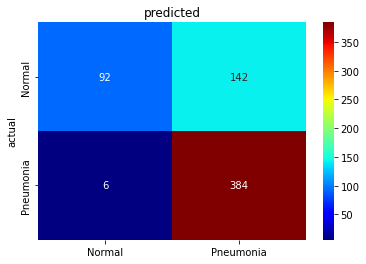

In [24]:
y_pred_svm=svm_model.predict(x_test)
print(classification_report(y_test,y_pred_svm))
cm = confusion_matrix(y_test,y_pred_svm)
sns.heatmap(cm,annot=True,cmap='jet',fmt="1",xticklabels={'Normal': 0, 'Pneumonia': 1},yticklabels={'Normal': 0, 'Pneumonia': 1})
plt.title("predicted")
plt.ylabel('actual')
plt.show()

Conclusion for SVC model:
    Accuracy is 76%.

# 2)Decision tree classifier

Decision Tree Classifier models are known for their interpretability, as the decision tree structure can be visualized and analyzed to understand how the model is making its predictions. However, decision trees can be prone to overfitting, particularly if the tree is allowed to grow to its full depth. Techniques such as pruning and setting a maximum depth can help to prevent overfitting. Decision trees can also be sensitive to the choice of splitting criterion and can struggle with complex datasets with many features.

In [25]:
from sklearn.tree import DecisionTreeClassifier
dct_model = DecisionTreeClassifier()
dct_model.fit(x_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.78      0.38      0.51       234
           1       0.72      0.93      0.81       390

    accuracy                           0.73       624
   macro avg       0.75      0.66      0.66       624
weighted avg       0.74      0.73      0.70       624



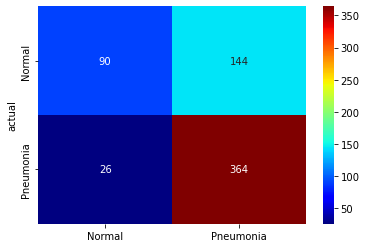

In [26]:
y_pred_dct=dct_model.predict(x_test)
print(classification_report(y_test,y_pred_dct))
cm = confusion_matrix(y_test,y_pred_dct)
sns.heatmap(cm,annot=True,cmap='jet',fmt="1",xticklabels={'Normal': 0, 'Pneumonia': 1},yticklabels={'Normal': 0, 'Pneumonia': 1})
plt.ylabel('actual')
plt.show()

Conclusion for DTC model:
    Accuracy is 73%.

# 3) k-Nearest Neighbors (k-NN)

The k-NN algorithm is a type of lazy learning algorithm that is used for both classification and regression tasks. It works by finding the k data points in the training set that are closest to a new data point and using their labels to make a prediction.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.97      0.25      0.40       234
           1       0.69      0.99      0.81       390

    accuracy                           0.72       624
   macro avg       0.83      0.62      0.61       624
weighted avg       0.79      0.72      0.66       624



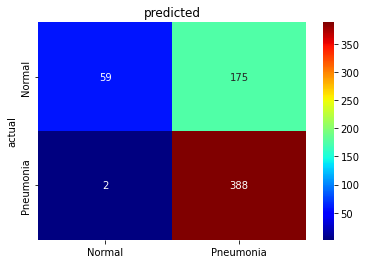

In [28]:
y_pred_knn=knn_model.predict(x_test)
print(classification_report(y_test,y_pred_knn))
cm = confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm,annot=True,cmap='jet',fmt="1",xticklabels={'Normal': 0, 'Pneumonia': 1},yticklabels={'Normal': 0, 'Pneumonia': 1})
plt.title("predicted")
plt.ylabel('actual')
plt.show()

Conclusion for K-NN model:
    Accuracy is 72%.

Conclusion:
    The process for conclusion of traditional machine learning models is similar to that of deep learning models, but the difference lies in the algorithms used and the complexity of the models. Deep learning models can handle more complex tasks and larger datasets, while traditional machine learning models are simpler and can handle smaller datasets.